# Week 6 - Catch-up from week 5 and filtering

Filtering of sinusoidals is fairly straightforward. It is defined a the **convolution** of a filter (Usually denoted $h(n)$) and a time signal $x(n)$.

**"But wait, we already know about convolution using images and kernels?"**

Right you are! There is next to no difference from the convolution of images vs the convolution of signals. Where in convolution of images (usually called 2d convolution), you 'slide' a **kernel** across the image and calculate values like so. In signal convolution (usually called 1d convolution), you 'slide' a **filter** across the signal and calculate values. For a continuous signal, this looks like so (Notice the filter has been flipped as to perform convolution and not cross-correlation):

<img src="images/Convolution.gif" 
        style="display: block; margin: 0 auto" />

<img src="images/Discrete_convolution_1.gif" 
        style="display: block; margin: 0 auto" />

In both cases, the filter that is plotted is usually called the **impulse response**. Explanations of this usually involve fancy maths about delta functions and whatever, but basically it is the output you get if you pass the filter over a function that consists of a single value (called a delta, or Dirac delta function):

<img src="images/delta_function.png"
        alt='The Mighty Delta Function'
        width = 800
        height = 600
        style="display: block; margin: 0 auto" />

You can think the **impulse response** as the "shape" of the filter, in the sense that you see how each new value is calculated.

As for the actual formula for convolution of signal, it is defined both for discrete and continuous signals (we will only use the discrete case in this course):
 
$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

$$y(t) =  x(t) * h(t) = \int^\infty{-\infty} x(t) h(t - \tau) d\tau$$

## Filtering in the frequency domain

First of, we can mention that you can take the fourier transform of a filter, just as you would a time signal. Next, probably mentioned before, but one nice property of the fourier transform, is that convolutions in the time domain become multiplications in the frequency domain.

And that's pretty much all there is to it... This is really cool since convolution is a rather slow operation, and fourier transforms are not (thanks to the FFT). That means, it is sometimes faster to take the FFT of a signal, multiply it with a filter, and take the inverse FFT, than it is to simply convolve the time domain version of the singal with the time domain filter.

**Another useful feature:** is that if you plot a filter in the frequency domain, it's impulse response will just show directly which frequencies will be attenuated or amplified, almost as a regular fourier transform plot would.

## 1 - Fourier transform again (revised exercises from last time)

**I may have screwed up a few places last time in regards to answers and formulas (sorry). If anything seems out of place compared to last week, the ground truth is here:**

$$f_s : \text{Sampling rate } \frac{1}{T_s} \text{ where $T_s$ is the distance between samples}$$

$$N: \text{Number of samples in total,sometimes calculated as} f_s \cdot \text{Duration (in seconds)}$$

$$c_k = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}} \quad \text{k'th fourier coefficient of a discrete signal}$$

$$F_k = \frac{k}{N}f_s \quad \text{Frequency corresponding the the k'th fourier coefficient} \text{$k = 0 \dots N$ if $N$ is even, $k = 0 \dots N-1$ if $N$ is odd}$$

$$A_k = \frac{c_k}{N}\cdot 2 \quad \text{Amplitude of the frequency corresponding to the k'th fourier coefficient}$$

The rest is just a rehash of the first exercise from last time, if you feel somewhat comfortable calculating fourier coeffcients, you can skip this.

### Exercise 1.1

*You are given the following information about a sampled signal:

- Sampling rate: $f_s = 4$
- Duration: $1s$
- Signal values $x(n) = [ 0,  1,  0, -1]$

**1. Using the formula for fourier coefficients: $c_k = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}}$, calculate the fourier coefficient for the signal $x(n)$ corresponding to $k = 1$**

$\dots$

**2. Calculate the frequency that the fourier coefficient for $k = 1$ corresponds to**

$\dots$

**3. Calculate the amplitude of the frequency that corresponds to the fourier coefficient for $k = 1$**

$\dots$

**4. Given the signal values for the above signal, what is the original analog signal?**

$\dots$

**$\star$ 5 Perform the same 4 exercises above but for $k = 3$ and for following values:**

- Sampling rate: $f_s = 4$
- Duration: $2s$
- Signal values $x(n) = [ 0,     2.828, -4,     2.828,  0,    -2.828,  4,    -2.828]$


$\dots$


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import read
from scipy.fft import fft, fftfreq, ifft # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this
from scipy.signal import butter, filtfilt, convolve, stft

### Exercise 1.2

*Far easier it is to create Python functions that calculate the fourier coeffcients for us*

**1. The first of the below two functions generates a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**

**Test your imlpementation using the cell below, you shuold get back the amplitudes associated with each frequency**

**2. Change the values of the sample rate, frequency, or duration to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

$\dots$

**3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

$\dots$

In [3]:
def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):
    N = ...
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [... for n, x_n in enumerate(signal_values)]
        coeffs.append(sum(prepared_to_sum))
        
        if v:
            frequency = ...
            absolute_coefficient = np.absolute(coeffs[k]) # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency}: {absolute_coefficient:.3f}, or an amplitude of {(2 * absolute_coefficient / N):.3f}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

In [4]:
frequencies = [0.5, 2] # Change these for 1.2.2
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5 # Change this for 1.2.2
duration = 2 # Change this for 1.2.2

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 0.5: 2.500, or an amplitude of 0.500
The fourier coeffcient associated with frequency 1.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 1.5: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 2.0: 5.000, or an amplitude of 1.000
The fourier coeffcient associated with frequency 2.5: 0.000, or an amplitude of 0.000
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 3.0: 5.000, or an amplitude of 1.000
The fourier coeffcient associated with frequency 3.5: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 4.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 4.5: 2.500, or an amplitude of 0.500


### Exercise 1.3

*In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect*

**1. Take a look at the below code, the fourier coefficient for the frequency 0.25 has not been found. Why is this?**

$\dots$

**2. How can you change the values of sample_rate and duration to alleviate this problem?**

$\dots$

**3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

$\dots$

In [1]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5
duration = 1

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

NameError: name 'generate_sine_wave' is not defined

## 2 - Properties of the fourier transform

*Two of the most touted properties of the fourier transform are arguably:*

1. It is linear, meaning $F(aX + bY) =  a\cdot F(X) + b \cdot F(Y)$
   1. This means, adding the scaled versions of signals in the time domain, equates to adding the scaled versions of their frequencies in the frequency domain
2. Convolutions in the time domain are multiplications in the frequency domain and vice versa, often written as  $f(x) * h(k) = F(X) \cdot H(X)$
   1. You need not know what this means specifically, but we will use it more next week

*We will just show the first in this exercise*

**$\star$ 1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*

$\dots$

**2. Show this condition of linearity by plotting what happens in the frequency domain when you add two scaled sine waves together. You can expand the cell below as a 'skeleton' for your code, or you can code it from scratch yourself**

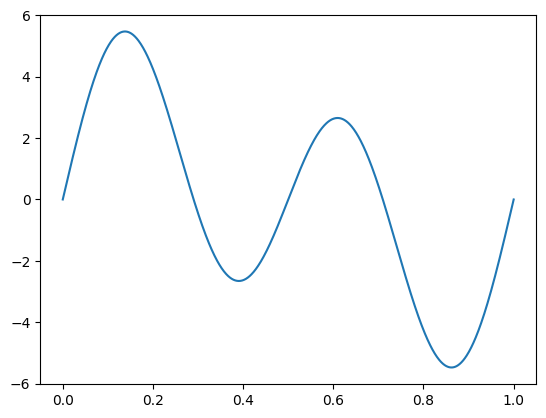

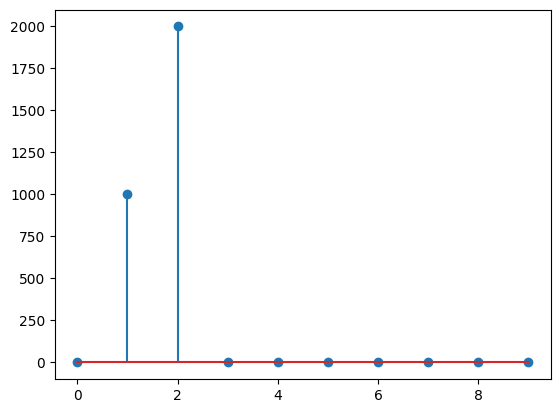

In [6]:
# Set duration of signal
duraion = ...

# Set sample rate
sample_rate = ...

# Create time values for signal
t = ...


# Define signals...
frequency_1 = 1
sine_wave_1 = ...

frequency_2 = 2
sine_wave_2 = ...

# Create linear combination of signals
a = 2
b = 4
signal_values = ...

# Get coefficients using previous fourier coefficients function
coeffs = ...


# Plot signal in time and frequency domain
plt.plot(t,signal_values)
plt.show()

plt.stem(coeffs[:10])
plt.show()

## 3 - Fourier transformations using packages

*As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation*

In [7]:
def sk_fourier_transform(time_signal, duration, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    
    # Frequency domain (FFT)
    N = ...
    yf = ... # Fourier coefficients
    xf = ... # Frequency values for the for the fourier coefficient bins
    
    # Get the timesteps that the signal exists over (just used for convenience, not needed for the FFT)
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.stem(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Exercise 3.1 

*Using the FFT functions from scipy isn't actually **that** simple*

**1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

**$\star$ 2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

**3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

$\dots$

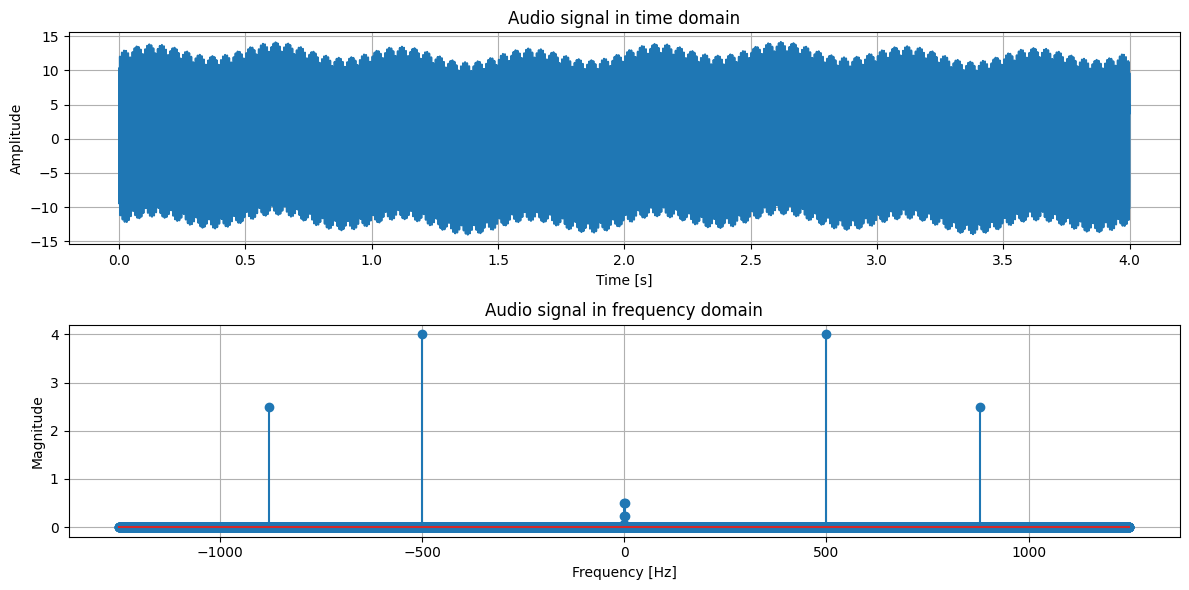

In [8]:
frequencies = [50, 100, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

### Exercise 3.2

*In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:*

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

**1. Complete the implementation to add noise to the observed time signal**

**2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

$\dots$

**3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

$\dots$

**3.1 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

$\dots$

**$\star$ 3.2 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

$\dots$

**$\star$ 4. Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

$\dots$


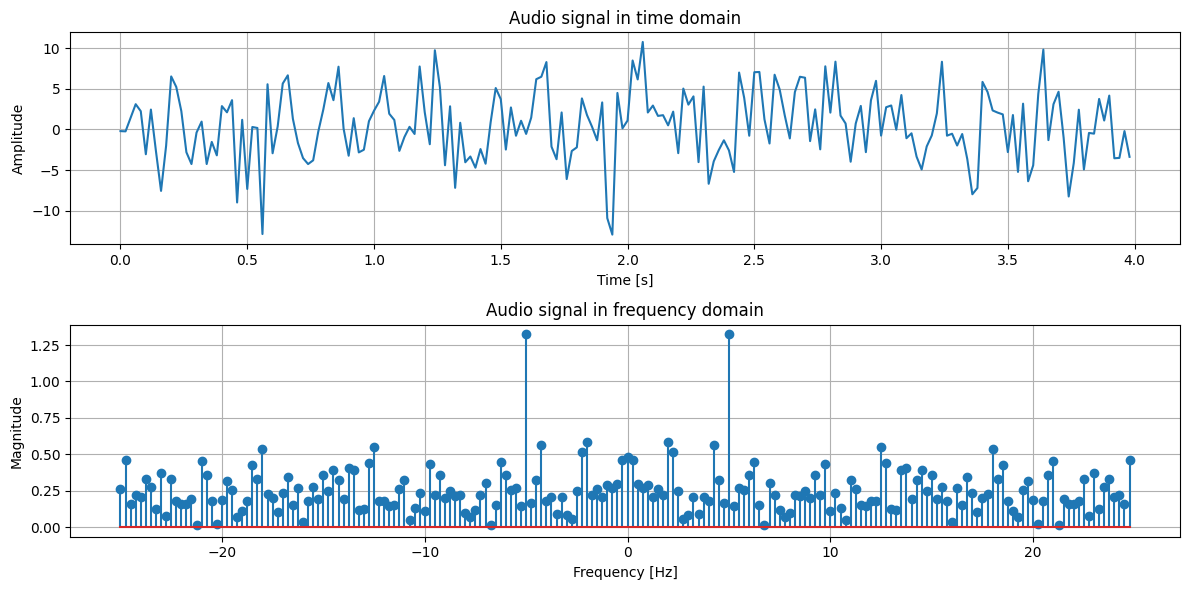

In [9]:
frequencies = [0.5, 2]
amplitudes = [0.5, 2]
phases = [0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 1 # Change this to increase the prescence of the noise
noise = ...       

noised_signal = ...

# Use preivously implemented fourier transform function to get the fourier coefficients
xf, yf, t = ...

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

### Exercise 3.3

*Another really useful property of the fourier transform, is that we as humans just cannot get much information from the time spectrum in general. Below is code to plot two different noised signals in the time and frequency domain. T*

**1. Consider the two noised signals below. Here the exercise is mostly to realize the importance of the frequency domain, especially in tasks that require pinpointing specific frequencies in signals. In the time domain, the signals look almost identical, in the frequency domain, there is a huge and obvious difference.**

**You will see this be useful again next week during assignment 2 when you need to classify brain waves based on their frequency content.**

In [ ]:
frequencies_signal_1 = [0.5, 2, 5]
amplitudes_signal_1 = [0.5, 1, 2]

frequencies_signal_2 = [20]
amplitudes_signal_2 = [5]

phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal_1 = generate_sine_wave(amplitudes_signal_1, frequencies_signal_1, phases, sample_rate, duration)
time_signal_2 = generate_sine_wave(amplitudes_signal_2, frequencies_signal_2, phases, sample_rate, duration)

noise = np.random.normal(loc=0, scale=4, size=len(time_signal_1))

noised_signal_1 = time_signal_1 + noise
noised_signal_2 = time_signal_2 + noise

xf_1, yf_1, t = sk_fourier_transform(noised_signal_1, duration, sample_rate)
plot_audio_signal(t, noised_signal_1, yf_1, xf_1, duration=duration)

xf_2, yf_2, t = sk_fourier_transform(noised_signal_2, duration, sample_rate)
plot_audio_signal(t, noised_signal_2, yf_2, xf_2, duration=duration)

### Exercise 3.4

*As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"*

*We redefine fourier transform and plotting functions to work with loaded data*

1. *A clean signal where only the speech is present*
2. *A signal where white noise has been added in the background*
3. *A signal where non-white noise in the form of a fan has been added*
4. *A signal where non-white noise in the form of human speech has been added*

**1. Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

$\dots$

**2. Load the two different noised signals. How do the different types of noise stand out from one another?**

$\dots$

**3. Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

$\dots$

**3.1 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

$\dots$

**4. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

$\dots$


In [10]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None, max_freq=5000):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    if max_freq is not None and max_freq > 0:
        idx = idx[:max_freq]


    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 48000Hz


/tmp/ipykernel_9266/2859801324.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


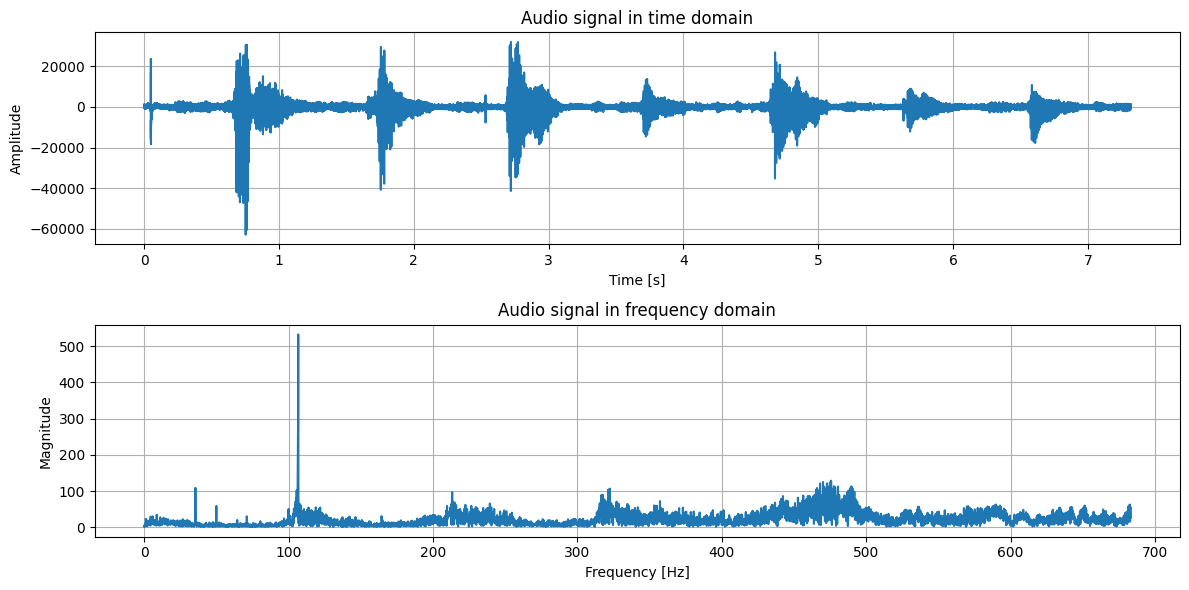

In [11]:
sofa_path = "audio/sofa.wav"
fan_noise_path = "noise_examples/fan_noise.wav"
talking_path = "noise_examples/talking.wav"

sample_rate, time_signal = read(sofa_path)
time_signal = 5 * np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd


def mix_noise(observed_signal, noise_paths, noise_amplitudes, white_noise_variance=10, whtie_noise_mean=0, white_noise_amplitude=10):
    """
    Load and mix different white noise sources
    """
    # Work with a copy of the observed signal so we don't corrupt the original input signal
    observed_signal_copy = np.copy(observed_signal)

    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        # Load in noised signal
        _, noise_signal = read(noise_path)
        # Convert to np array (as above) and index to make sure it is as long as the observed signal
        noise_signal = ...
        # Mix with observed signal by adding as a weighted sum
        observed_signal_copy += ...

    # Create and add white noise - Remember to have as many white noise samples as the length of the signal
    white_noise = ...
    # Mix with observed signal, same as above
    observed_signal += ...

    return observed_signal_copy


# Use function just defined above
time_signal = mix_noise(...)

# Create fourier transform, plot signal
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration, max_freq=5000)

# Play audio as a widget - Way better than using sounddevice
Audio(time_signal,rate = sample_rate)



## 4 - Reflections on noise

### Exercise 4.1

*Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'*

**1. Alice uses her phone to call Bob. Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones). Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

**1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

$\dots$

**1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

$\dots$

**2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

$\dots$

**3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

$\dots$


# 5 - Filtering

As mentioned, filtering is rather easy enough, we are going to focus on just convolution, plotting filters and using filters in time and frequency domain. As a reminder, the formula for signal convolution is

$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

## High-, low, and band-pass filtering

The most commonly used filters, are usually some variant of high-pass filters, low-pass filters and band-pass filters. They work in the following ways:

- **High-pass**: Let the high frequencies pass, meaning the result is a signal with only high frequencies
- **Low-pass**: Let the low frequencies pass, meaning the signal will only have low frequencies
- **Band-pass**: Let frequencies in a specific band (for example 400 to 800 Hz) pass, meaning the signal will only have those frequencies


### Exercise 5.1

*It is good thing to try at least one manual calculation of convolution with a filter, as terrible as it may sound...*

**1. Given the below values:**

$$x_n = \begin{cases} 
        \frac{1}{2} n  & \text{for} 0 \leq n \leq 6 \\
        0 & \text{elsewhere}
        \end{cases}
$$


$$h_n = \begin{cases} 
        1  & \text{for} -2 \leq n \leq 2 \\
        0 & \text{elsewhere}
        \end{cases}
$$

**Calculate $y(k)$ as a of the convolution $x(k) * h(k)$ for $k = -1$, $k = 4$ and $k = 7$**

$\dots$


### Exercise 5.2

*I meant to have an exercise centered around implementing your own convolution function to use a pre-made filter to do low-pass filtering... However that was prohibitively overcomplicated. Take that as a lesson, that if someone else has done it, it is probably better than what you can make yourself*

*That said, we still wanna 'get' filtering. Both manually and using packages. Below the functions butter_lowpass and butter_lospass_filter create a so-called [butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) filter and apply it to a signal respectively.*

**1. Inspect the plots created by running the code two cells below. What are the visibile effects on time and frequency domain?**

$\dots$

**2. Change the value of the frequency_cutoff, how does this change the plots and the resulting audio?**

$\dots$

**$\star$ 3. The Butterworth filter is described as a 'maximally flat magnitude filter' what do you think this refers to. Why can we in actuality not just construct a completely flat filter?**

$\dots$

In [12]:
def butter_lowpass(cutoff, fs, order=5):
    """
    Create a butterworth lowpass filter, given a cutoff frequency and sampling rate
    """
    # Nyquist rate
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Use scipy to get butter filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Create and apply a butterworth lowpass filter to a signal
    """
    # Create lowpass filter using afforementioned function
    b, a = butter_lowpass(cutoff, fs, order=order)
    # Apply filter using filtfilt function
    y = filtfilt(b, a, data)
    return y

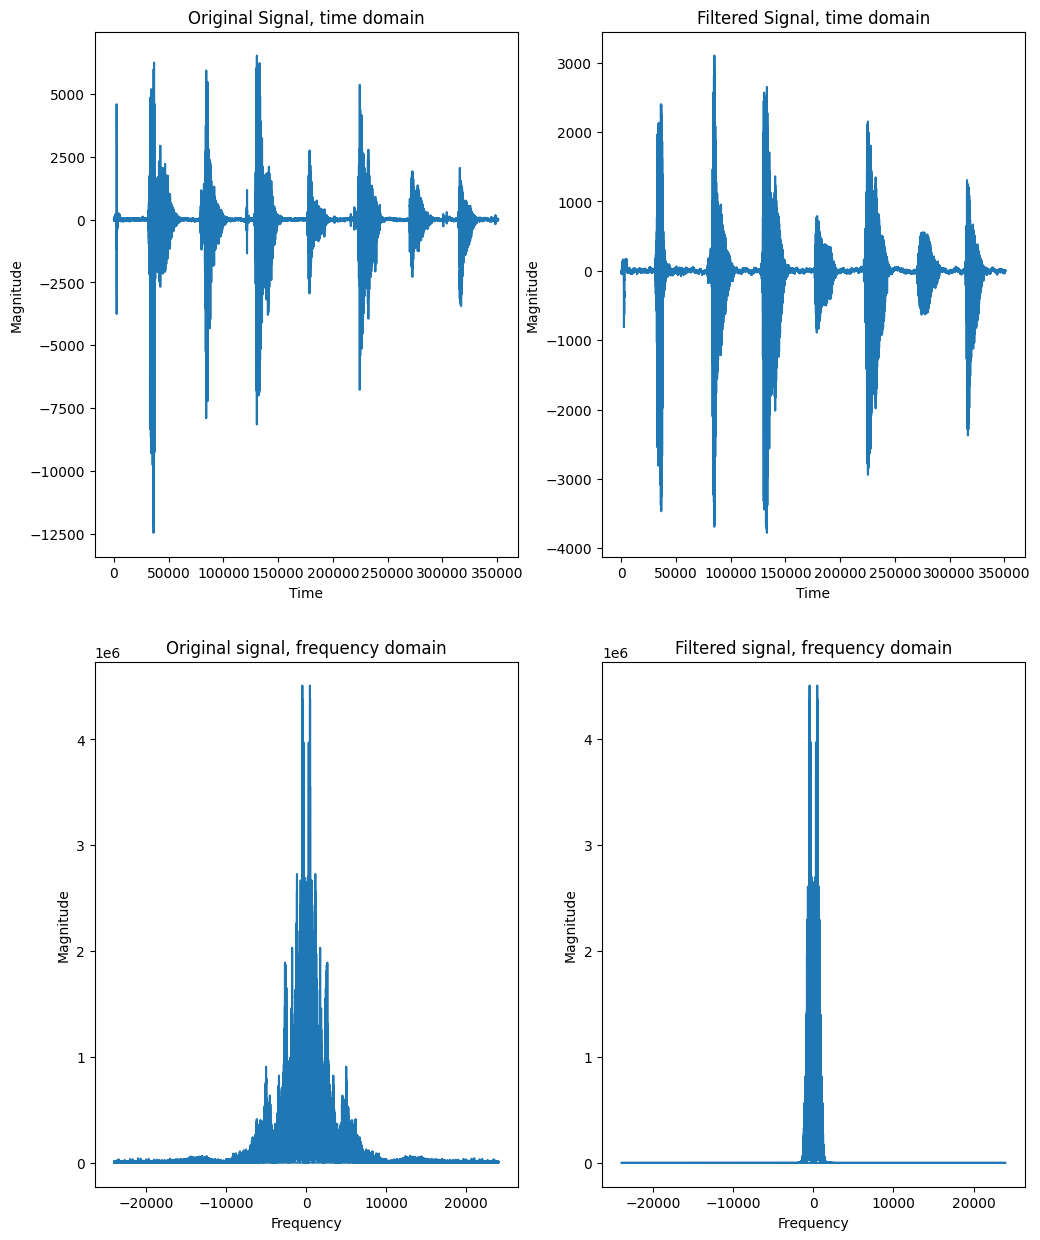

In [13]:
# Read sofa example, same as before
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Filter time signal using butter lowpass filter, only let frequencies of frequency_cutoff pass
frequency_cutoff = 1000
filtered_signal = butter_lowpass_filter(time_signal, 1000, fs=sample_rate, order= 5)

fig, axs = plt.subplots(2, 2, figsize=(8, 12))

# Plot the original signal in the time domain
axs[0, 0].plot(np.arange(len(time_signal)), time_signal)
axs[0, 0].set_title('Original Signal, time domain')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the time domain
axs[0, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[0, 1].set_title('Filtered Signal, time domain')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Magnitude')

# Obtain freqeuncy domain
xf = fftfreq(len(time_signal), 1 / sample_rate)
yf_original = np.abs(fft(time_signal))
yf_filtered = np.abs(fft(filtered_signal))

# Plot the original signal in the frequency domain
axs[1, 0].plot(xf, yf_original)
axs[1, 0].set_title('Original signal, frequency domain')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the frequency domain
axs[1, 1].plot(xf, yf_filtered)
axs[1, 1].set_title('Filtered signal, frequency domain')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')


Audio(filtered_signal, rate = sample_rate)


### $\star$ Exercise 5.3

*Below we implement filtering manually, which can be scary. We do this in two ways: One is simply multiplying the values in the frequency spectrum. The other is using the filter from the aforementioned method to convolve the signal in time domain. This avoids the somewhat more stringent math of creating filters in the time domain.*

**1. Complete the code to perform filtering in the frequency domain** 

**2. Inspect the plots of the filtering code. Determine what kind of filter it is by looking at its impulse response, as well as the fourier spectrum of the filtered signal**

$\dots$

**3. Change the type of the filter by changing the cutoff_freq parameter. Try to make a high-pass filter and a band-pass filter. Listen to the resulting audio from both these**

**$\star \star$ 4. As mentioned, we can also filter in the time domain. Do so using the apply_convolution function and answer the following questions:**

1. What do we use the IFFT for?
2. Why do we use np.roll?
3. What is the result of the convolution compared to frequency domain filtering?

$\dots$


In [14]:
def frequency_domain_filtering(time_signal : np.ndarray, sample_rate : int, cutoff_freq : list):
    """
    Filter a signal by multiplying its fourier transform with specific values
    Args:
        time_signal (np.ndarray): input time-domain signal
        sample_rate (int): sampling rate of the signal
        cutoff_freq (list): list of [low_cutoff, high_cutoff] frequencies
    """

    # Get fourier transform and fourier bins
    yf = fft(time_signal)
    xf = fftfreq(len(time_signal), 1 / sample_rate)

    # Find the index in the yf array corresponding to the cutoff frequencies
    idx_lowpass = ...
    idx_highpass = ...

    # Create a frequency mask (both positive and negative frequencies are included)
    frequency_mask = np.zeros(len(xf))
    # Set all values in the frequency mask to pass through the filter
    frequency_mask[idx_lowpass:idx_highpass] = 1
    frequency_mask[-idx_highpass:-idx_lowpass if cutoff_freq[0] > 0 else len(xf)] = 1  # Handle negative frequencies as well
    
    # Apply the frequency mask to the Fourier transformed values
    yf_filtered = ...
    
    # Perform inverse Fourier transform to get filtered time-domain signal
    filtered_signal = ...

    return filtered_signal, frequency_mask

def apply_convolution(time_signal: np.ndarray, frequency_mask: np.ndarray):
    """
    Apply convolution using a filter kernel obtained from inverse FFT of the frequency mask.
    Args:
        time_signal (np.ndarray): Original time-domain signal.
        frequency_mask (np.ndarray): Frequency mask used in the filtering process.
    Returns:
        convolved_signal (np.ndarray): Signal after applying convolution.
    """

    # Obtain the filter kernel by inverse Fourier transform of the frequency mask
    filter_kernel = np.real(ifft(frequency_mask))
    
    # Shift kernel to be centered (necessary since the kernel is symmetric)
    filter_kernel = np.roll(filter_kernel, len(filter_kernel) // 2)

    # Perform convolution with the time signal (if using convolution methods, don't use your own, use scipy's (it's faster))
    convolved_signal = convolve(time_signal, filter_kernel, mode='same')

    return convolved_signal, filter_kernel



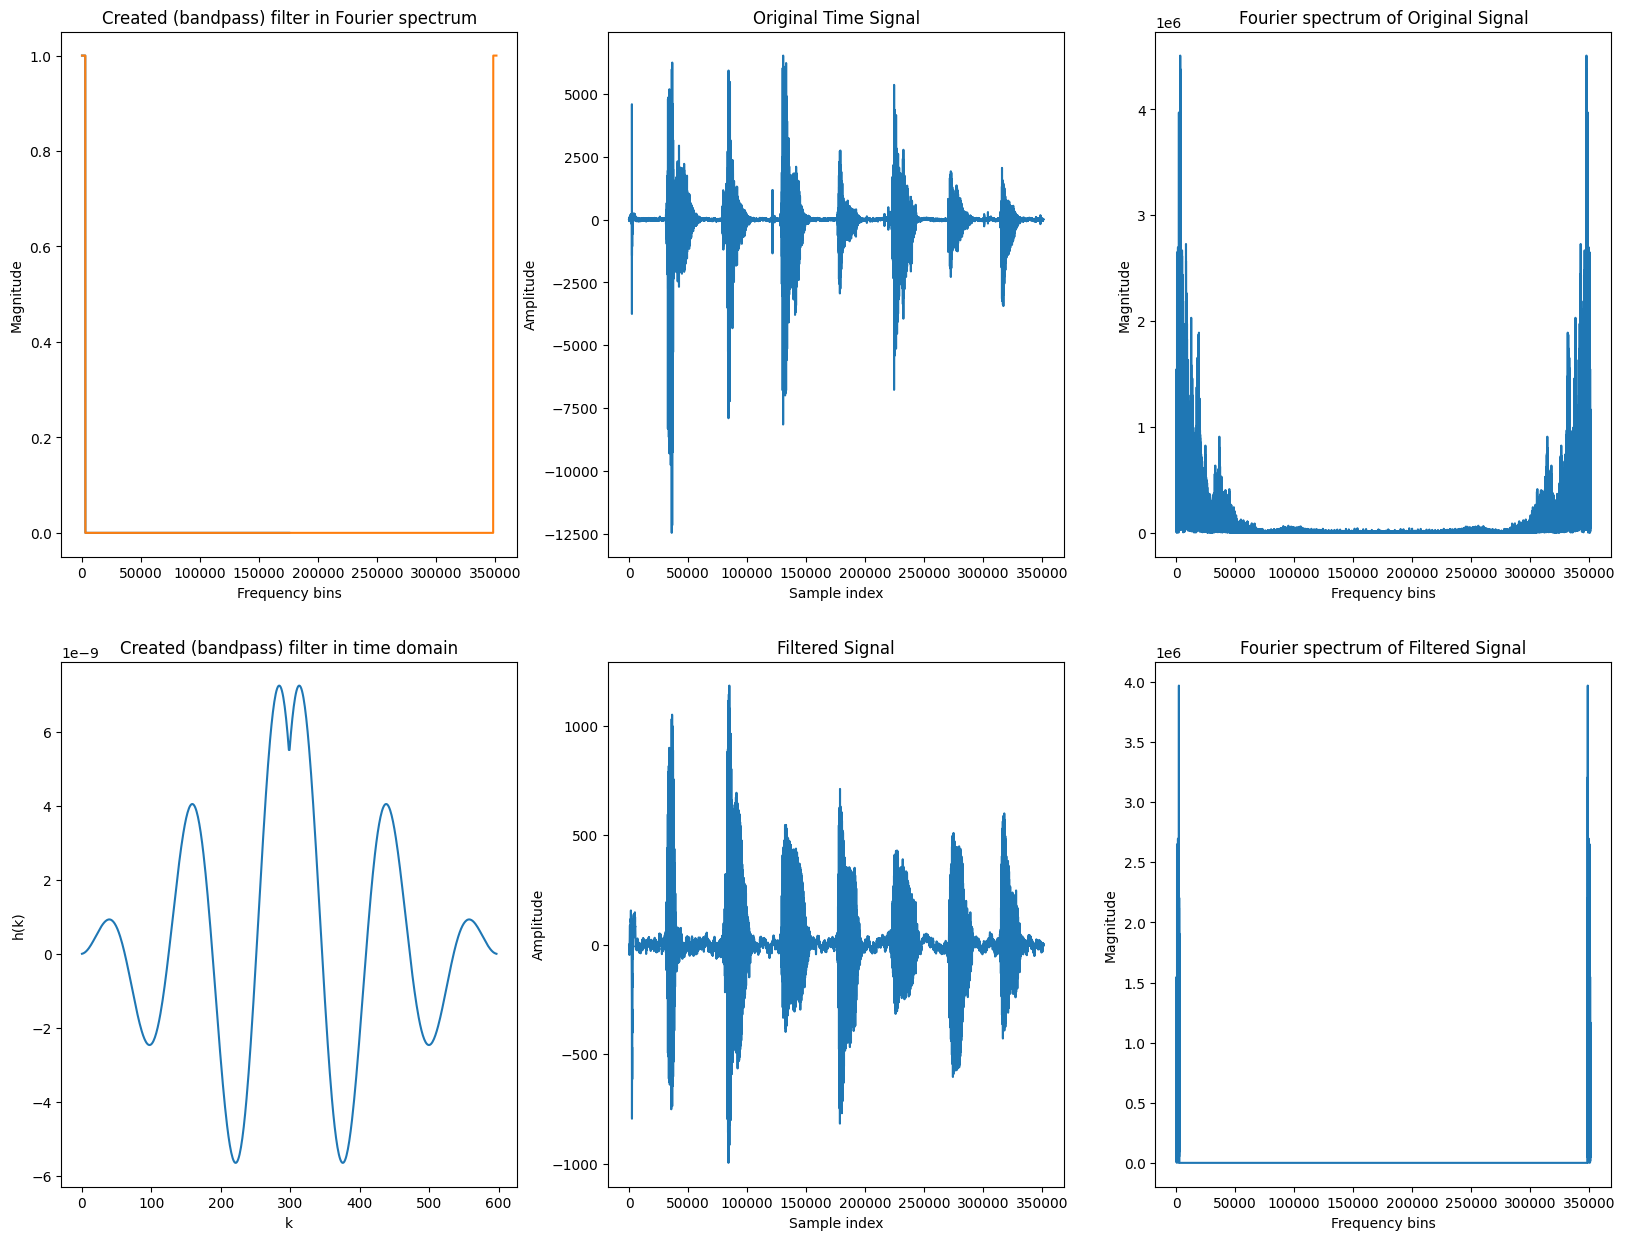

In [15]:
# Load audio same as before...
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Filter the signal in frequency domain
filtered_signal, frequency_mask = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[0, 380])

# Filter signal in time domain
convolved_signal, time_filter = apply_convolution(time_signal, frequency_mask)

# Obtain the FFT of the original and filtered signals respectively
original_freq_domain = np.abs(fft(time_signal))
filtered_freq_domain = np.abs(fft(filtered_signal))


############## PLOTTING ##############

# Create a 3x2 subplot layout
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Plot the filter kernel in frequency domain
axs[0, 0].plot(np.arange(len(frequency_mask[:len(frequency_mask) // 2])), frequency_mask[:len(frequency_mask) // 2])
axs[0, 0].plot(frequency_mask)
axs[0, 0].set_title('Created (bandpass) filter in Fourier spectrum')
axs[0, 0].set_xlabel('Frequency bins')
axs[0, 0].set_ylabel('Magnitude')

# Plot filter in time domain
# time_filter_limited = time_filter[len(time_filter) // 2 - 250: len(time_filter) // 2 + 250] # If you want to see the middle of the filter
# Get the first 300 and last 300 indices of the time filter
first = time_filter[1:300]
last = time_filter[-300:-1]
time_filter_limited = np.concatenate((first, last))
axs[1, 0].plot(np.arange(len(time_filter_limited)), time_filter_limited)
axs[1, 0].set_title('Created (bandpass) filter in time domain')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('h(k)')

# Plot the original time signal
axs[0, 1].plot(np.arange(len(time_signal)), time_signal)
axs[0, 1].set_title('Original Time Signal')
axs[0, 1].set_xlabel('Sample index')
axs[0, 1].set_ylabel('Amplitude')

# Plot the convolved signal
axs[1, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[1, 1].set_title('Filtered Signal')
axs[1, 1].set_xlabel('Sample index')
axs[1, 1].set_ylabel('Amplitude')

# Plot the Fourier domain of the original signal
axs[0, 2].plot(np.arange(len(original_freq_domain)), original_freq_domain)
axs[0, 2].set_title('Fourier spectrum of Original Signal')
axs[0, 2].set_xlabel('Frequency bins')
axs[0, 2].set_ylabel('Magnitude')

# Plot the Fourier domain of the filtered signal
axs[1, 2].plot(np.arange(len(filtered_freq_domain)), filtered_freq_domain)
axs[1, 2].set_title('Fourier spectrum of Filtered Signal')
axs[1, 2].set_xlabel('Frequency bins')
axs[1, 2].set_ylabel('Magnitude')

# Display the audio created
Audio(filtered_signal, rate = sample_rate)

## Exercise 6 - The Short-Time Fourier transform



*There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems*

**1. Why would you do this?**

The answer can vary, but the main reason is in use for signals where the frequency content can change quickly. Take for example human speech where the frequency content can change widely depending on what is being said.

Another example (that I am currently working on), is when you have a signal that has been filtered with an unknown signal and need to unfilter it. The STFT lets you amplify or attentuate frequencies on specific timesteps, rather than frequencies over the entire time domain. This lets you have much greater dergree of granularity when doing inverse problems such as that.


**2. How do you implement this?**

Shown below. You need a few more parameters that the regular FT, most of which determine how the different time segments overlap. The 'window' parameter is a kind of filter that determines how one or more time segments overlap, while the nperseg is how many time units is used for each segment. A larger number creates a more 'mean value' for each segment and has smoother transitions, as well as being faster, while a smaller value gives greater granularity in what the frequency content is at a specific timestep, but can vary more and is slower.


**3. What extra things do you do to make the spectogram look nice?**

A bunch. I'm not an audio engineer or anything like that, but it includes these changes to make the spectogram more "visually appealing", including:

- Thresholding the frequency magnitudes by the n'th percentile to remove unecessary frequencies which could otherwise "pollute" the plots
- Converting the magnitude of the FFT to dB (by multiplying by 20 and taking log10)
- Smoothing the dB values using a gaussian filter to just make them less "janky"


**Just to reiterate: YOU DO NOT NEED TO UNDERSTAND BELOW CODE!!! It's mostly (boring) plotting stuff, some of it made by chatgpt and such**

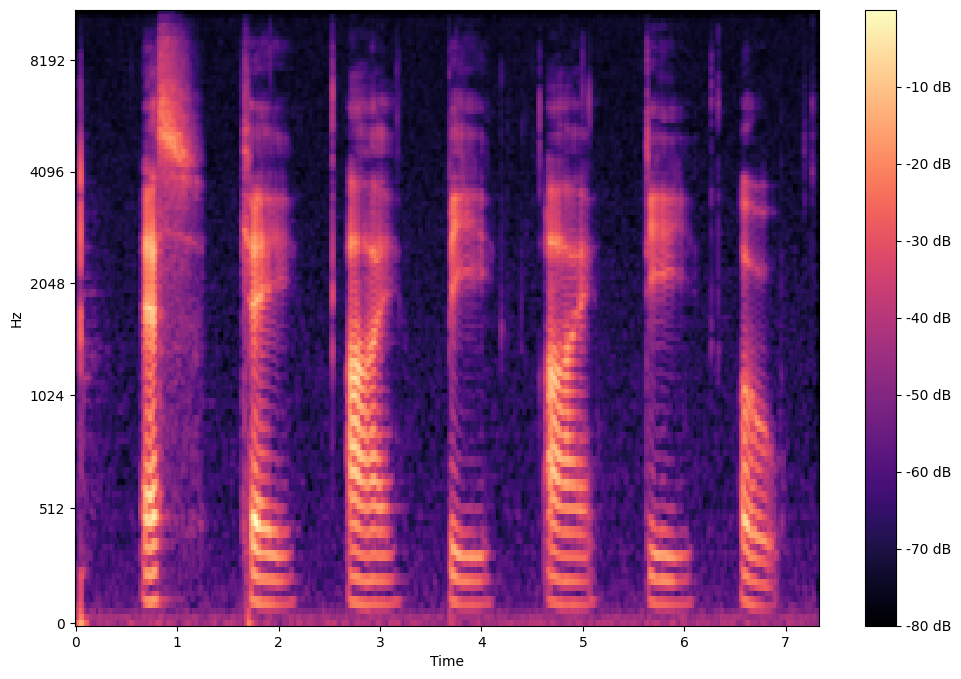

In [2]:
############## MATPLOTLIB AND NUMPY IMPLEMENTATION - LESS 'BLACK BOXY' ###########
# def plot_stft(time_signal, sample_rate, max_freq=10000,
#                 smooth=True, convert_to_db=True, 
#                 threshold=75, title=None):
    
#     # Perform STFT
#     f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hamming')

#     # Filter out the frequencies above the desired range
#     freq_mask = f <= max_freq
#     f_filtered = f[freq_mask]
#     Zxx_filtered = Zxx[freq_mask, :]

#     Zxx_magnitude = np.abs(Zxx_filtered)
    
#     if threshold: # If trehsold is set, remove all values below the (to reinforce the most important parts of the signal)
#         threshold = np.percentile(Zxx_magnitude, 75)
#         Zxx_magnitude[Zxx_magnitude < threshold] = 0
    
#     if convert_to_db:
#         Zxx_magnitude_db = 20 * np.log10(Zxx_magnitude + 1e-10)  # Add a small epsilon to avoid log(0)
        
#     else:
#         Zxx_magnitude_db = Zxx_magnitude

#     if smooth: # Smoothing to make the plot more visually appealing
#         from scipy.ndimage import gaussian_filter
#         Zxx_magnitude_db = gaussian_filter(Zxx_magnitude_db, sigma=0.5)

#     # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
#     plt.figure(figsize=(10, 6))
#     plt.pcolormesh(t, f_filtered, Zxx_magnitude_db, shading='gouraud')
#     if not title:
#         plt.title('Spectrogram of the Audio Signal')
#     else:
#         plt.title(title)
#     plt.ylabel('Frequency [Hz]')
#     plt.xlabel('Time [sec]')
#     plt.colorbar(label='Magnitude (dB)')
#     plt.show()


    # return time_signal, sample_rate


# def load_file_and_plot_stft(file_path, start_duration=None, **kwargs):  
#     """
#     Just a convenience function to load a file *and* plot the stft of it
#     """
#     sample_rate, time_signal = read(file_path)

#     if start_duration:
#         time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

#     # Pre-process time signal
#     time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd


#     time_signal, sample_rate = plot_stft(time_signal, sample_rate, **kwargs)
#     return time_signal, sample_rate

# _ = load_file_and_plot_stft('audio/sofa.wav', title='Spectogram S O F A example')

# sample_rate, time_signal = read('R060_004.wav')
# time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd


######### LIBROSA IMPLEMENTATION - MIGHT BE BETTER #########
import librosa
import librosa.display
def plot_stft(time_signal, sample_rate, max_freq=10000,
                mel=True, title=None, **kwargs):

    # Compute spectrogram - Use mel spectogram to better capture frequencies of note
    if mel:
        spec = librosa.feature.melspectrogram(y=time_signal, sr=sample_rate)
    else:
        spec = np.abs(librosa.stft(y=time_signal)) ** 2
    # Convert power to decibels
    spec_db = librosa.power_to_db(spec, ref=np.max)

    # Plot spectrogram
    # fig, ax = plt.subplots(nrows = 1, ncols = 1)
    plt.figure(figsize=(12,8))
    img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')
    # plt.colorbar(img, ax = ax, format='%+2.0f dB')
    plt.colorbar(img, format='%+2.0f dB')
    plt.title(title)
    plt.show()

    return time_signal, sample_rate

def load_file_and_plot_stft(file_path, start_duration=[0, None], **kwargs):
    # Load audio file
    time_signal, sample_rate = librosa.load(file_path, offset=start_duration[0], duration=start_duration[1], mono=True)
    plot_stft(time_signal, sample_rate, **kwargs)
    return time_signal, sample_rate

_, _ = load_file_and_plot_stft('audio/sofa.wav')



### Exercise 6.1 

*STFT and filtering is often used together. Here we play around with different types of filtering*

**1. Use both low-pass and high-pass on the sofa example before and plot the STFT**

**$\star$ 2. Plot the STFT for one the noised sofa examples and see if you can clean the STFT somewhat using filtering, or by changing the settings of the STFT plot (such as threshold). Specifically see if you can solve the following problems:**

1. Remove (most) of the fan noise using a high-pass filter
2. Remove (most) of the white noise using low-pass filter
3. Try (and no doubt fail) to remove some of the talking noise using whatever filter you feel would be appropriate


In [3]:
# Load audio same as before...
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Create signal noised by the fan
fan_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0.5, 0], white_noise_amplitude=0)
# Filter out fan noise...
fan_filtered_noised_signal, _ = ...

# Create signal with white noise
white_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0, 0], white_noise_amplitude=50)
# Filter out white noise...
white_filtered_noised_signal, _ = ...

# Create signal noised by speech
speech_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0, 1], white_noise_amplitude=0)
# Filter out speech noise
speech_filtered_noised_signal, _ = ...

# Plot and play resulting audio
plot_stft(speech_noised_signal, sample_rate, max_freq=5000, smooth=True, convert_to_db=True, threshold=75, title="Spectogram of noised data")
Audio(speech_filtered_noised_signal, rate = sample_rate)


NameError: name 'mix_noise' is not defined

### Exercise 6.2 (Easy)

**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

**Here is where the exercises end. If you want, I've collected a bunch of different examples of sound in the extra_spectograms folder that I think would be interesting to see both the spectogram of, if not also the fourier transform and the time domain signal. You can plot them using the below code if you want**

**Note, you can change the 'max_freq' if you want to see higher frequencies or want greater resolution on the lower frequencies.**

**If you want, you can also play around with the filters from before to see if you can get truly cursed stft's or audio...**

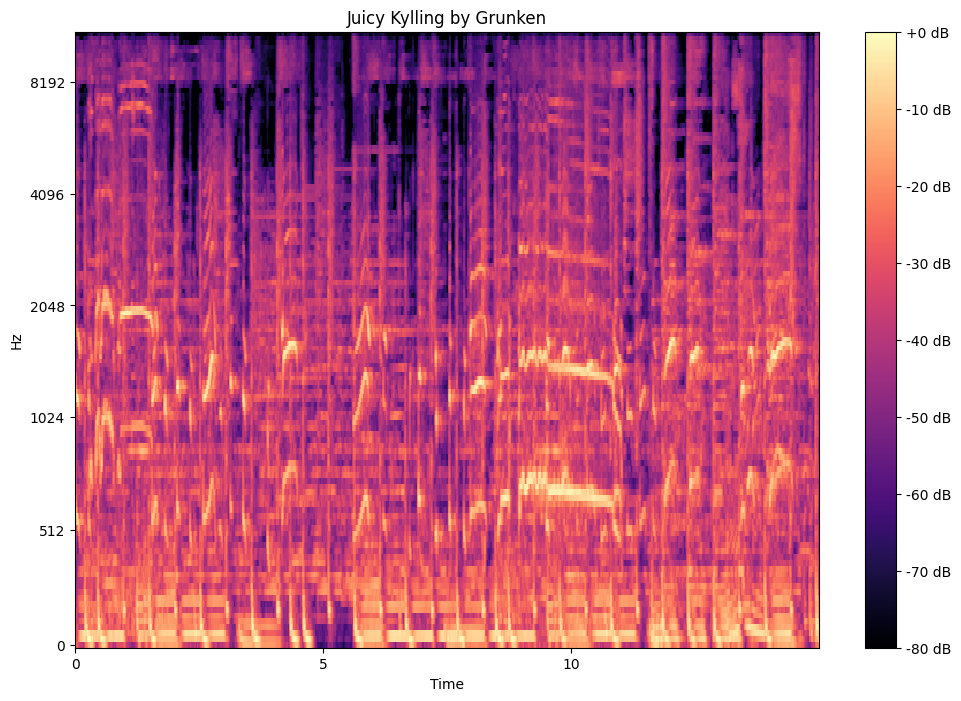

In [4]:
import titles

# Three typical examples of young-people music
time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/good_music.wav", max_freq=5000, start_duration=[30, 15], title=titles.all_titles[0])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/hutcher.wav", max_freq=5000, title=titles.all_titles[1])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/broken.wav", max_freq=5000, title=titles.all_titles[2])

# A bass singer (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_singer.wav", max_freq=5000, title=titles.all_titles[3])

# A tenor singer (high pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/tenor_singer.wav", max_freq=5000, title=titles.all_titles[4])

# A guitar solo (medium pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/guitar_solo.wav", max_freq=10000, title=titles.all_titles[5])

# A bass solo (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_solo.wav", max_freq=5000, title=titles.all_titles[6])
# A songbird (perhaps distortion)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/songbird.wav", max_freq=5000, title=titles.all_titles[7])

# A human songbird (????)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/human_songbird.wav", max_freq=5000, title=titles.all_titles[8])

# A bunch of people talking at the same time
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/people_talking.wav", max_freq=5000, title=titles.all_titles[9])


# TODO: Optionally apply some filtering here
# time_signal, frequency_mask = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[2000, 4000])

# If you want to play the audio
Audio(time_signal,rate = sample_rate)
